#### Libraries

In [1]:
# Importing libraries 
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.io import fits
import pandas as pd
import urllib.request
import requests
import time

#Getting the individual coadded files names
local_dir = "/home/colgoat/Jupyter/" #path to the catalogs

#### Data entry

In [2]:

pn_sv1 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv1/dark/" # File database link for sv1
pn_sv3 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/" # File database link for sv3
EDR_qsolist = [] # List of spectra of interest from DESI EDR
print("\n")
print("---------------------------------------------")
print("\n")
file1 = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv1)
lc_sv1 = os.path.join(local_dir,file1) # lc_sv1 = Local file sv1
fc_sv1 = fits.open(lc_sv1) # fc_sv1 = Open .fits catalog file of sv1
SV1 = Table.read(fc_sv1) # SV1 = Reading the file of SV1 as a BinTable
q_sv1 = (SV1['Z']>=2.1) & (SV1['PROGRAM']=='dark') # q_sv1 = Query from main catalog (filtering)
catfil_sv1 = SV1[q_sv1] # catfil_sv1 = Filtered catalog sv1
catfil_sv1_hpix = catfil_sv1.group_by("HPXPIXEL") # catfil_sv1 = Grouping filtered catalog by HEALPIX criteria
HPX_sv1 = catfil_sv1_hpix["HPXPIXEL"]/100 # HPX_sv1 = Getting the healpix ID for path on database
print("Number of spectra in SV1: ",len(catfil_sv1)) # Showing the number of targets on screen
for p,m in zip(HPX_sv1,catfil_sv1_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv1+str(int(p))+"/"+str(m)+"/coadd-sv1-dark-"+str(m)+".fits")
fc_sv1.close()
file2 = "QSO_cat_fuji_sv3_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv3)
lc_sv3 = os.path.join(local_dir,file2) # lc_sv3 = Local file sv3
fc_sv3 = fits.open(lc_sv3) # fc_sv3 = Open .fits catalog file of sv3
SV3 = Table.read(fc_sv3) # SV3 = Reading the file of SV3 as a BinTable
q_sv3 = (SV3['Z']>=2.1) & (SV3['PROGRAM']=='dark') # q_sv3 = Query from main catalog (filtering)
catfil_sv3 = SV3[q_sv3] # catfil_sv3 = Filtered catalog sv3
catfil_sv3_hpix = catfil_sv3.group_by("HPXPIXEL") # catfil_sv3 = Grouping filtered catalog by HEALPIX criteria
HPX_sv3 = catfil_sv3_hpix["HPXPIXEL"]/100 # HPX_sv3 = Getting the healpix ID for path on database
print("Number of spectra in SV3: ",len(catfil_sv3))
for p,m in zip(HPX_sv3,catfil_sv3_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv3+str(int(p))+"/"+str(m)+"/coadd-sv3-dark-"+str(m)+".fits")
fc_sv3.close()
EDRcat_stk = vstack(([catfil_sv1,catfil_sv3])) # EDR filtered catalogs stacked for both surveys and sorted
EDRcat_stk.sort(['TARGETID','SURVEY'])
print("Total number of DESI EDR spectra (SV1 & SV3) to be used: ",len(EDR_qsolist))



---------------------------------------------




Number of spectra in SV1:  11853
Number of spectra in SV3:  14910
Total number of DESI EDR spectra (SV1 & SV3) to be used:  26763


#### Histograms

/tmp/ipykernel_17529/212950039.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/tmp/ipykernel_17529/212950039.py:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


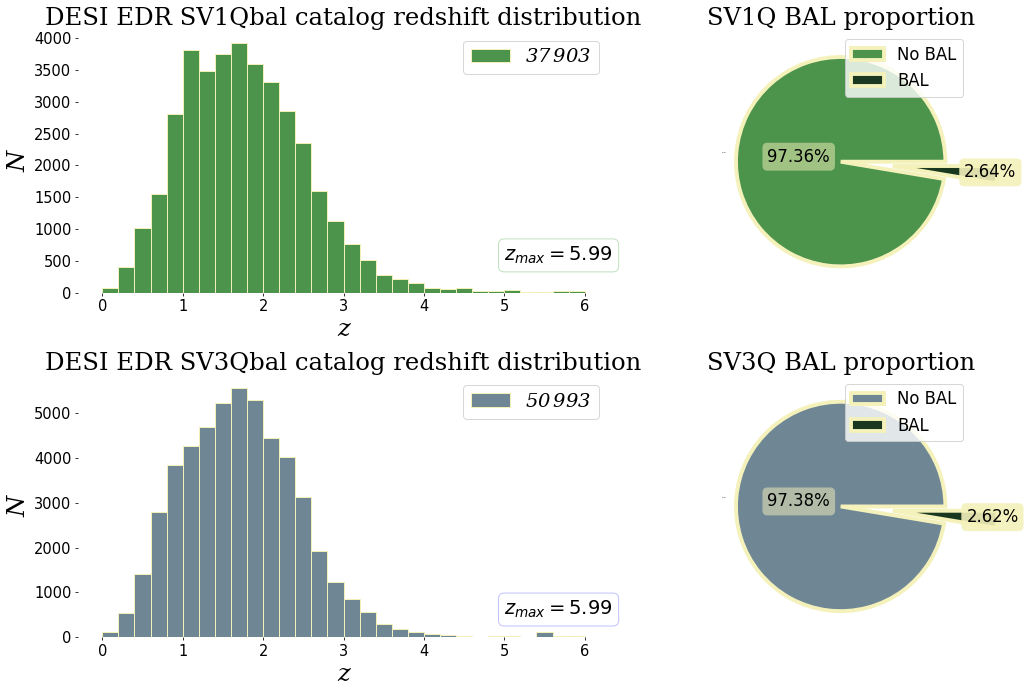

In [3]:
#plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=70)

colrs14 = ["#4C934C", "#19381F"]
colrs16 = ["#6F8695", "#19381F"]
edgecol = '#F4F1BB'


lbls = ["No BAL", "BAL"]
expl = [0, 0.5]
titles = ['DESI EDR SV1Qbal catalog','DESI EDR SV3Qbal catalog']

zm = [max(SV1['Z']),max(SV3['Z'])]

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}

plt.subplot(2, 2, 1)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.hist(SV1['Z'],alpha = 1, color =colrs14[0], 
         label = str(len(SV1))[0:2]+'$\,$'+str(len(SV1))[2:5], range = (0,6), bins = 30, edgecolor=edgecol)
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[0]+" redshift distribution", weight='normal', style= 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5, 500, ('$z_{max} = $'+str(round(zm[0],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'green'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



plt.subplot(2, 2, 3)
plt.hist(SV3['Z'],alpha = 1, color = colrs16[0], 
         label = str(len(SV3))[0:2]+'$\,$'+str(len(SV3))[2:5], range = (0,6), bins = 30, edgecolor=edgecol)
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[1]+" redshift distribution", weight='normal', style = 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5, 500, ('$z_{max} = $'+str(round(zm[1],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'blue'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



#DR14
#a = (SV1['THING_ID']>0) & (SV1['Z']>=2.1) & (SV1['RA']!=SV1['DEC']) \
        #& (SV1['RA']>0) & (SV1['MJD']< 56870) & (SV1['BI_CIV']<=0)
#b = (SV1['THING_ID']>0) & (SV1['Z']>=2.1) & (SV1['RA']!=SV1['DEC']) \
        #& (SV1['RA']>0) & (SV1['MJD']< 56870) & (SV1['BI_CIV']>0)
a = (SV1['BI_CIV']<=0)
b = (SV1['BI_CIV']>0)


I14 = len(SV1[a])
Ib14 = len(SV1[b])
pidat14 = np.array([I14,Ib14])
plt.subplot(2, 2, 2)
plt.pie(pidat14, labels = lbls, explode = expl, colors = colrs14, textprops = {'fontsize': 0},
       wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True})
plt.title(titles[0][9:13]+" BAL proportion", weight='normal', style= 'normal', family = 'serif', size =25)


nBAL14 = [(I14/len(SV1))*100,(Ib14/len(SV1))*100]

plt.text(-0.7, 0,str(round(nBAL14[0],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.18, -0.15,str(round(nBAL14[1],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.9, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)




#DR16:
#c = (SV3['THING_ID']>0) & (SV3['Z']>=2.1) & (SV3['RA']!=SV3['DEC']) \
        #& (SV3['RA']>0) & (SV3['MJD']< 56870) & (SV3['BI_CIV']<=0)
#d = (SV3['THING_ID']>0) & (SV3['Z']>=2.1) & (SV3['RA']!=SV3['DEC']) \
        #& (SV3['RA']>0) & (SV3['MJD']< 56870) & (SV3['BI_CIV']>0)
c =(SV3['BI_CIV']<=0)
d =(SV3['BI_CIV']>0)


I16 = len(SV3[c])
Ib16 = len(SV3[d])
pidat16 = np.array([I16,Ib16])
plt.subplot(2, 2, 4)
plt.pie(pidat16, labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True})
plt.title(titles[1][9:13]+" BAL proportion",weight='normal', style= 'normal', family = 'serif', size =25)


nBAL16 = [(I16/len(SV3))*100,(Ib16/len(SV3))*100]

plt.text(-0.7, 0,str(round(nBAL16[0],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.2, -0.15,str(round(nBAL16[1],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.9, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)
plt.show()


#### BLA and DLA Proportion in the sample

In [4]:
fileDESI = "DESIedr_FINALcat.fits"
local_fileDESI = os.path.join(local_dir,fileDESI)
desi = Table.read(local_fileDESI)

In [5]:
a = (desi['BI_CIV']<=0)
b = (desi['BI_CIV']>0)

I = len(desi[a])
Ib = len(desi[b])
pidat = np.array([I,Ib])
nBAL = [(I/len(desi))*100,(Ib/len(desi))*100]

In [6]:
colrsDESI = ["#4C934C", "#19381F"]
edgecol = '#F4F1BB'

expl = [0, 0.5]
z_ticks = [0,2,2.5,3,3.5,4,4.5,5,5.5,6]
N_ticks = [0,1000,2000,3000,4000,5000,6000,7000,8000]
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :25}

titles = ['DESI EDR P1D sample','none']

/tmp/ipykernel_17529/1860965262.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_17529/1860965262.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


Text(0, 0.5, 'No public DLA catalog yet')

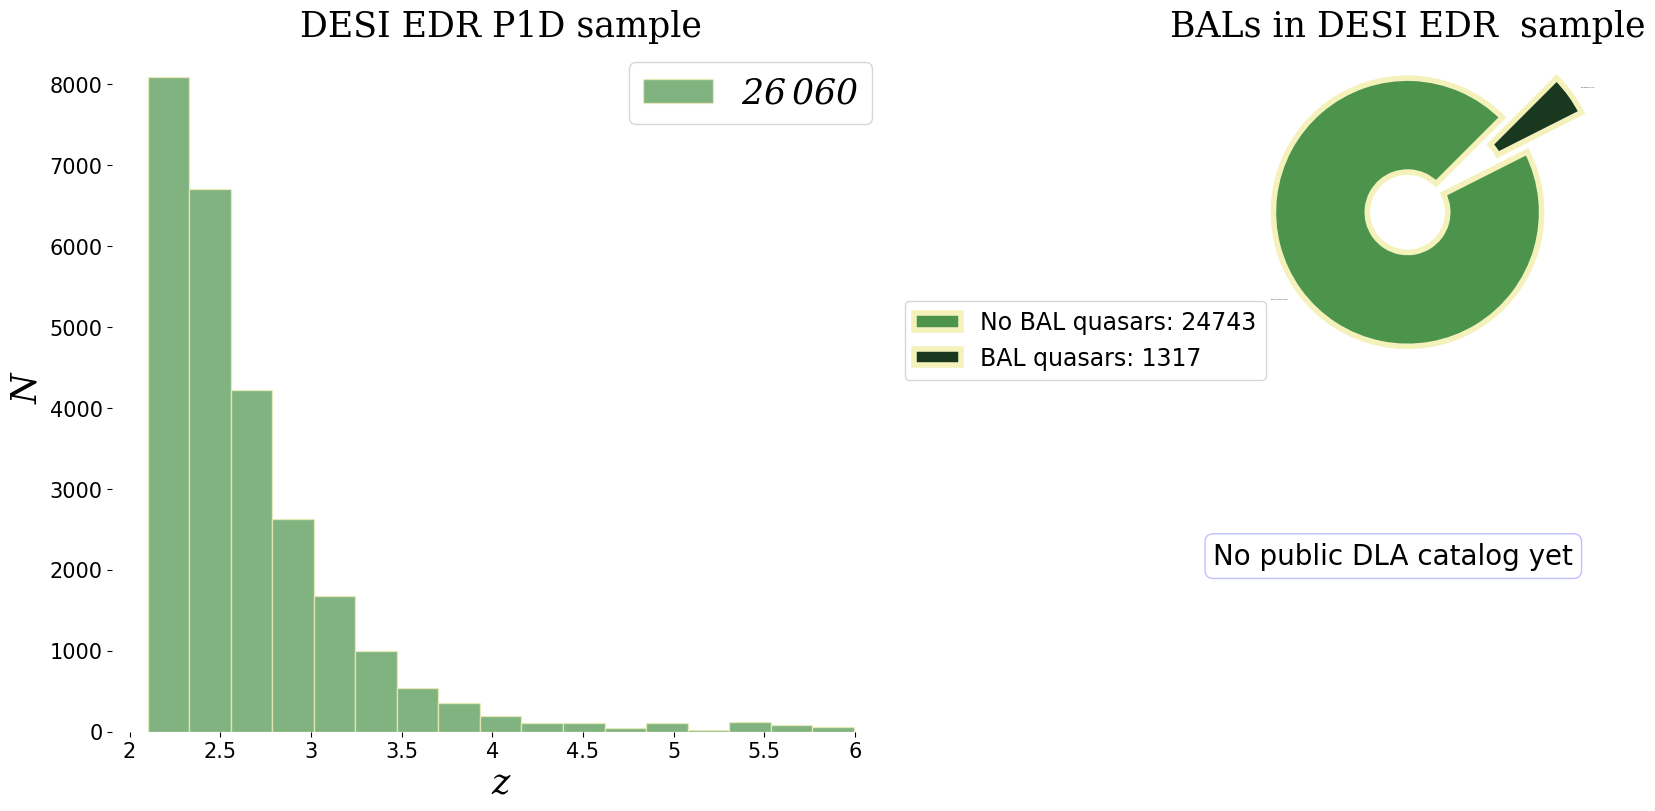

In [7]:
fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(desi['Z'],alpha = 0.7, color =colrsDESI[0], label = str(len(desi))[0:2]+'$\,$'+str(len(desi))[2:5]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[0]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I), "BAL quasars: "+str(Ib)]
ax['BAL'].pie(pidat,  startangle=45, 
        labels = lbls, explode = expl, colors =colrsDESI, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])

ax['DLA'].axis('off')
ax['DLA'].text(0, 0.5, ('No public DLA catalog yet'), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'blue'}, size = 20)


## Redshift space and coordinates

In [8]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r
sv1 = desi[desi['SURVEY'] == 'sv1']
sv3 = desi[desi['SURVEY'] == 'sv3']

z1 = np.array(sv1['Z'])
z3 = np.array(sv3['Z'])
titles = ['SV1','SV3']

RA1 = np.array(sv1['TARGET_RA'])
DEC1 = np.array(sv1['TARGET_DEC'])
eq1 = SkyCoord(RA1, DEC1, unit=u.deg)
ra_rad1 = eq1.ra.wrap_at(180 * u.deg).radian
dec_rad1 = eq1.dec.radian



RA3 = np.array(sv3['TARGET_RA'])
DEC3 = np.array(sv3['TARGET_DEC'])
eq3 = SkyCoord(RA3, DEC3, unit=u.deg)
ra_rad3 = eq3.ra.wrap_at(180 * u.deg).radian
dec_rad3 = eq3.dec.radian

/tmp/ipykernel_17529/195166512.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_17529/195166512.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


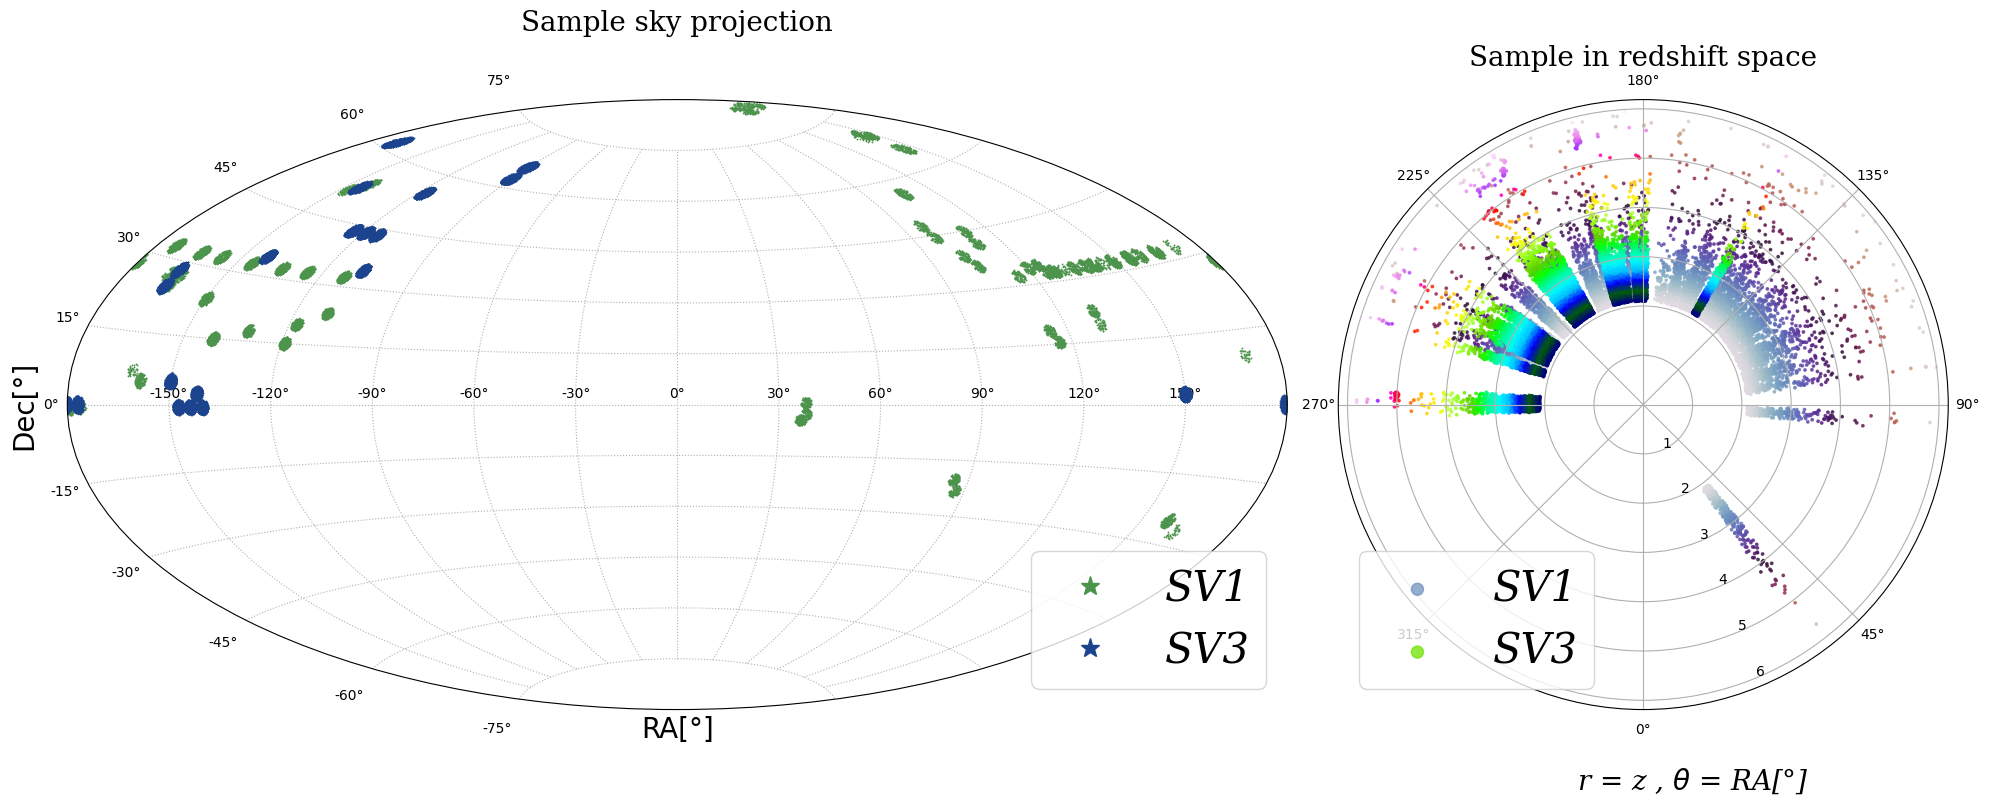

In [9]:
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :30}

fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(20,15),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad1, dec_rad1, '*', markersize=0.7, alpha=1, color = '#4C934C', label ='SV1')
ax0.plot(ra_rad3, dec_rad3, '*', markersize=0.7, alpha=1, color = '#1C448E', label ='SV3')
ax0.grid(True,linestyle=':')
ax0.legend(loc="lower right", prop = txt_prop, markerscale=20)



ax1 = plt.subplot(122, projection='polar')
colors1 = sv1['Z']
colors3 = sv3['Z']
ax1.scatter(rad(sv1['TARGET_RA']), sv1['Z'], c=colors1, 
            alpha=0.75,cmap='twilight', s=3, label ='SV1')
ax1.scatter(rad(sv3['TARGET_RA']),sv3['Z'], c=colors3, 
            alpha=0.75,cmap='gist_ncar', s=3, label ='SV3') #, edgecolors = 'k'
ax1.set_theta_zero_location('W', offset=90)
ax1.legend(loc="lower left", prop = txt_prop, markerscale=5.0)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('DESI EDR quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)
plt.show()

In [10]:
100-(73+24)

3